In [15]:
import numpy as np  
import pandas as pd  
import plotly.express as px  # Для создания интерактивных визуализаций
import plotly.graph_objects as go  # Для кастомных графиков
from plotly.subplots import make_subplots  # Для создания subplots
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ParisHousing.csv', header=0, sep=',')

# Проверим структуру данных
print("Размер датасета (строки, колонки):", df.shape)
print("\nПервые 10 строк датасета:")
df.head(10)

Размер датасета (строки, колонки): (10000, 17)

Первые 10 строк датасета:


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


In [16]:
print("Названия колонок:")
print(df.columns.tolist())
print("\nИнформация о датасете:")
df.info()  # Показываем информацию о типах данных и наличии пропусков

Названия колонок:
['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64

In [17]:
# Базовая статистика данных
# describe(): генерирует описательную статистику для числовых колонок
# round(2): округляет значения до 2 десятичных знаков
print("\nСтатистическое описание данных:")
df.describe().round(2)


Статистическое описание данных:


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00
mean,49870.13,50.36,0.51,0.5,50.28,50225.49,5.51,5.52,2005.49,0.5,0.5,5033.10,5028.01,553.12,0.5,4.99,4993447.53
std,28774.38,28.82,0.50,0.5,28.89,29006.68,2.87,2.86,9.31,0.5,0.5,2876.73,2894.33,262.05,0.5,3.18,2877424.11
min,89.00,1.00,0.00,0.0,1.00,3.00,1.00,1.00,1990.00,0.0,0.0,0.00,1.00,100.00,0.0,0.00,10313.50
25%,25098.50,25.00,0.00,0.0,25.00,24693.75,3.00,3.00,1997.00,0.0,0.0,2559.75,2512.00,327.75,0.0,2.00,2516401.95
50%,50105.50,50.00,1.00,0.0,50.00,50693.00,5.00,5.00,2005.50,0.0,0.0,5092.50,5045.00,554.00,1.0,5.00,5016180.30
75%,74609.75,75.00,1.00,1.0,76.00,75683.25,8.00,8.00,2014.00,1.0,1.0,7511.25,7540.50,777.25,1.0,8.00,7469092.45
max,99999.00,100.00,1.00,1.0,100.00,99953.00,10.00,10.00,2021.00,1.0,1.0,10000.00,10000.00,1000.00,1.0,10.00,10006771.20


In [18]:
fig = px.histogram(df, 
                   x='price', 
                   title='Распределение цен на жилье в Париже (price)',
                   labels={'price': 'цена '},
                   nbins=30,
                   template='plotly_white')
fig.update_layout(bargap=0.1)  # bargap: зазор между столбцами
fig.show()

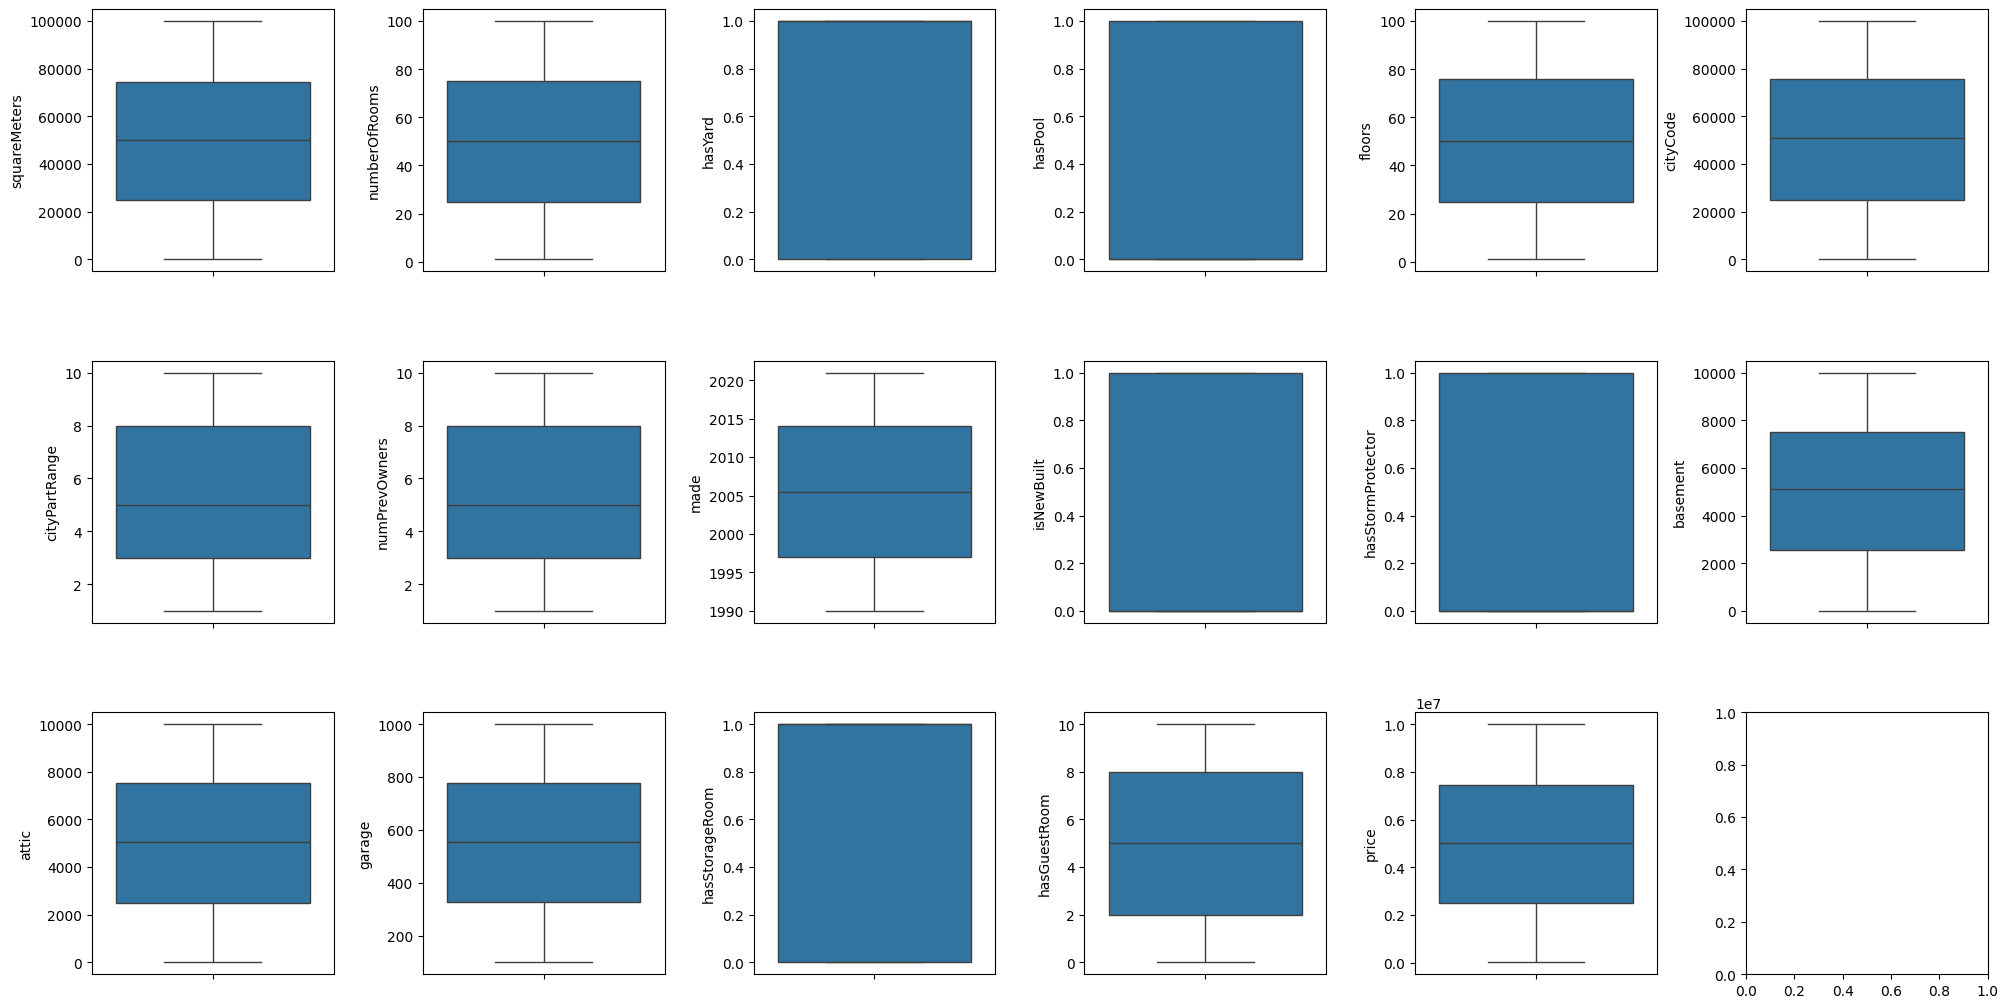

In [19]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Данные все полные и нормально распределены. Можно начинать анализ на TensorFlow